In [1]:
# ------------------------------------------------------------------------
#
# TITLE - measure_pwfs_slopes.ipynb
# AUTHOR - James Lane
# PROJECT - AST 1500
# CONTENTS:
#
# ------------------------------------------------------------------------
#
# Docstrings and metadata:
'''Measure the slopes of the PWFS
'''

__author__ = "James Lane"

In [4]:
### Imports

## Basic
%run ../../src/_helpers/basic_imports.py
from PIL import Image

## Plotting
# from matplotlib.backends.backend_pdf import PdfPages
# from matplotlib import colors
# from matplotlib import cm

## Astropy
# from astropy.io import fits
# from astropy.coordinates import SkyCoord
# from astropy import table

## Project-specific
sys.path.insert(0,'../../src/')
# import project_module.sub_module

Basic imports:
numpy as np, sys, os, copy, glob, subprocess,
matplotlib.pyplot as plt, matplotlib as mpl, astropy.units as apu


In [3]:
### Notebook setup

## Matplotlib for notebooks
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Debugging, 
# to automatically drop in during error use %pdb
from IPython.core.debugger import set_trace

# Get image
Get the sensor image and define the pupil locations

In [10]:
data_filename = 'Pyramid_Focus_2019-06-20-141025-0000.jpg'
data = np.array( Image.open(data_filename) )
print(data.shape)
data = np.sum( data, axis=2 )
print(data.shape)

(1024, 1280, 3)
(1024, 1280)


Show the pupils

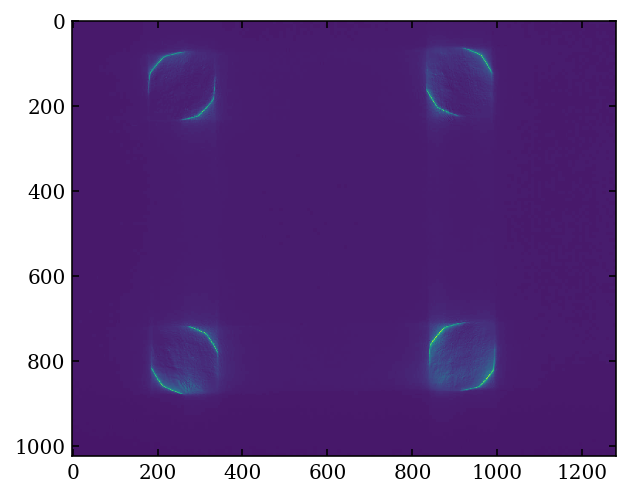

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(data)
fig.set_facecolor('White')
plt.show()

In [36]:
n_pupil=4
pupil_shape = 'square'
pupil_radius = 85
# Pupil locations: down and across
pupil_locations = np.array([[150,260],
                            [145,910],
                            [800,265],
                            [790,920]],dtype='int')

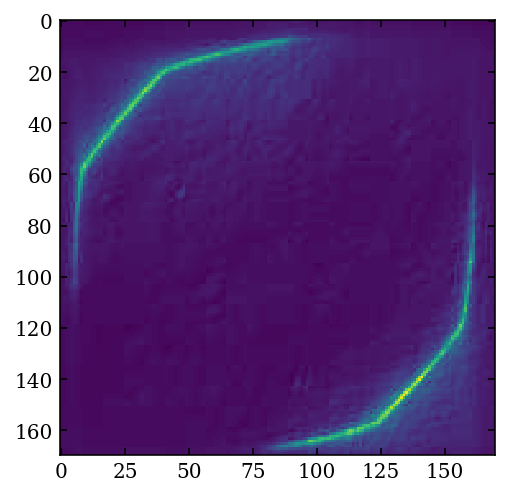

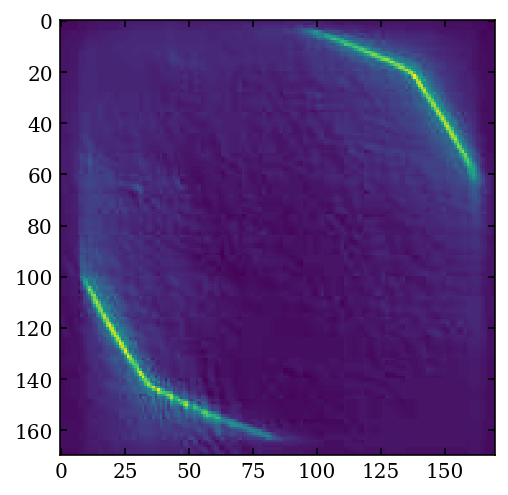

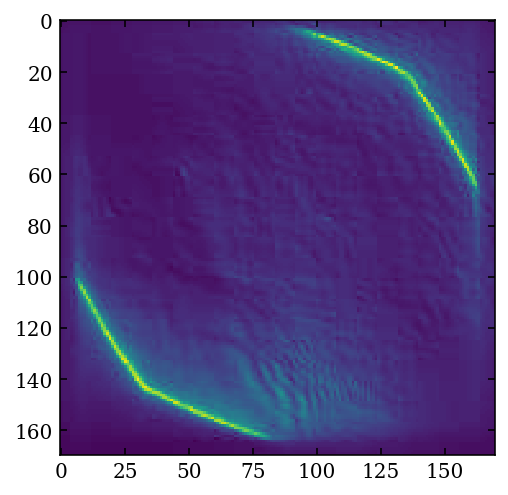

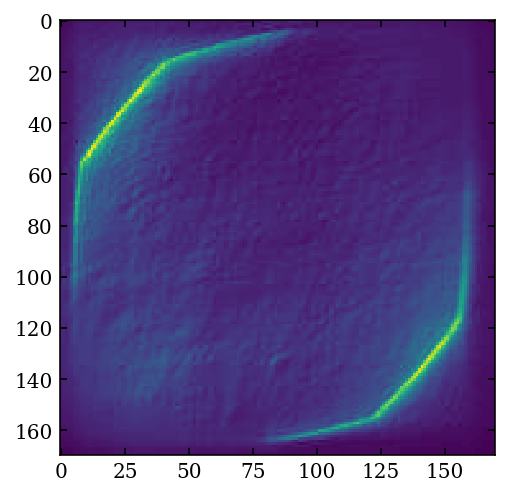

In [37]:
for i in range(n_pupil):
    fig = plt.figure()
    fig.set_facecolor('White')
    ax = fig.add_subplot(111)
    sub_data = data[ pupil_locations[i,0]-pupil_radius : pupil_locations[i,0]+pupil_radius,
                     pupil_locations[i,1]-pupil_radius : pupil_locations[i,1]+pupil_radius
                   ]
    ax.imshow( sub_data )
    plt.show()
###i

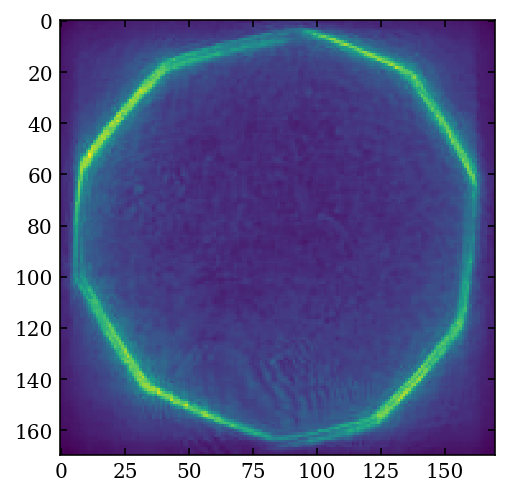

In [39]:
for i in range(n_pupil):
    if i == 0:
        sub_data_sum = data[pupil_locations[i,0]-pupil_radius:pupil_locations[i,0]+pupil_radius,
                            pupil_locations[i,1]-pupil_radius:pupil_locations[i,1]+pupil_radius
                           ]
    else:
        sub_data_sum += data[pupil_locations[i,0]-pupil_radius:pupil_locations[i,0]+pupil_radius,
                             pupil_locations[i,1]-pupil_radius:pupil_locations[i,1]+pupil_radius
                            ]
    ##ie
###i

fig = plt.figure()
fig.set_facecolor('White')
ax = fig.add_subplot(111)
ax.imshow( sub_data_sum )
plt.show()